In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# load MNIST dataset
data = keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = data

Text(0.5, 0, '5')

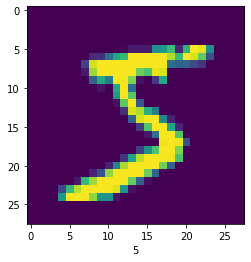

In [3]:
plt.imshow(X_train[0])
plt.xlabel(y_train[0])


In [5]:
# scale X_train datasets
X_train = X_train/ 255
X_test = X_test / 255

X_train.shape

# # reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train.shape


(60000, 28, 28, 1)

In [6]:
cnn = keras.models.Sequential([
    # cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    # dense
    keras.layers.Flatten(),
    keras.layers.Dense(units=100, activation="relu"),
    keras.layers.Dense(units=10, activation="sigmoid")
])

cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2021-12-10 11:42:09.895610: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-10 11:42:09.895752: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
cnn.fit(X_train, y_train, epochs=10)

2021-12-10 11:42:11.140411: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-10 11:42:11.140569: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-10 11:42:11.289209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.9305 - accuracy: 0.7085
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3532 - accuracy: 0.8959
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3050 - accuracy: 0.9100
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2740 - accuracy: 0.9192
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2494 - accuracy: 0.9265
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2294 - accuracy: 0.9324
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2136 - accuracy: 0.9362
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1998 - accuracy: 0.9409
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1889 - accuracy: 0.9442
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [8]:
cnn.evaluate(X_test, y_test)

 28/313 [=>............................] - ETA: 1s - loss: 0.1835 - accuracy: 0.9431

2021-12-10 11:44:42.674701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.1839 - accuracy: 0.9431


[0.1838710457086563, 0.9431000351905823]

In [19]:
y_predict = cnn.predict(X_test)
np.argmax(y_predict[0])

7

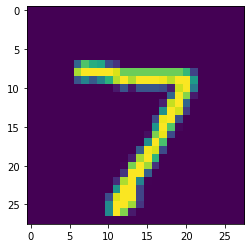

In [21]:
plt.imshow(X_test[0])